In [164]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, assemble,ClassicalRegister
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector



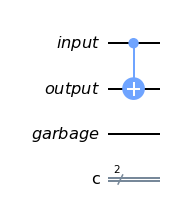

In [165]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

cr = ClassicalRegister(2, 'c')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit,cr)
Uf.cx(input_bit[0], output_bit[0])
#Uf.measure(output_bit[0], cr[0])


Uf.draw()

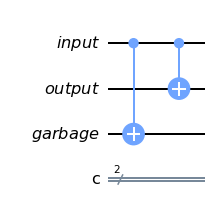

In [166]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit,cr)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

/tmp/ipykernel_467/3365953289.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = Uf + Vf.inverse()


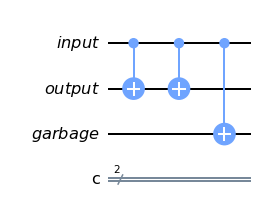

In [167]:
qc = Uf + Vf.inverse()
qc.draw()

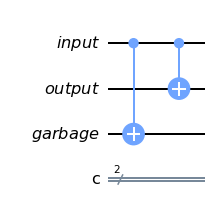

In [168]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit,cr)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

/tmp/ipykernel_467/3365953289.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = Uf + Vf.inverse()


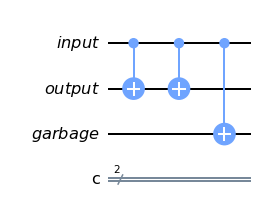

In [169]:
qc = Uf + Vf.inverse()
qc.draw()

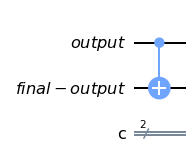

In [170]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit,cr)
copy.cx(output_bit, final_output_bit)


copy.draw()

/tmp/ipykernel_467/1798197855.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  (Vf + copy + Vf.inverse()).draw()


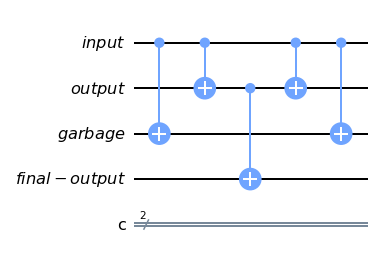

In [171]:
(Vf + copy + Vf.inverse()).draw()

/tmp/ipykernel_467/1908666607.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc_result = (Vf + copy + Vf.inverse())


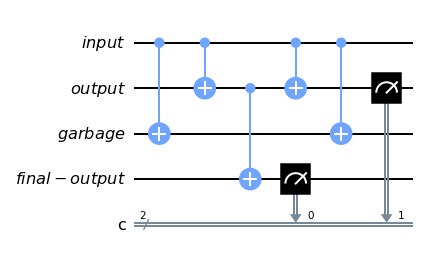

In [172]:


qc_result = (Vf + copy + Vf.inverse())

qc_result.measure(output_bit[0], cr[1])
qc_result.measure(final_output_bit[0], cr[0])
qc_result.draw()

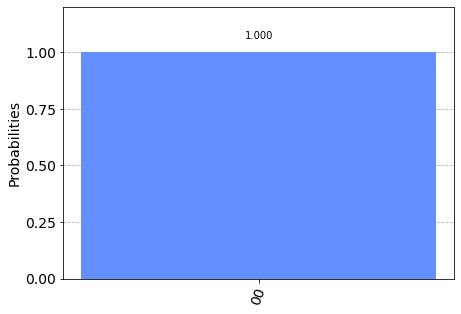

In [173]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc_result)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

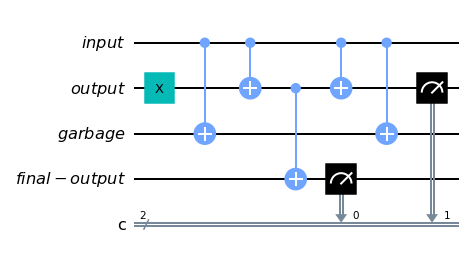

In [181]:
qc_test = QuantumCircuit(input_bit, output_bit, garbage_bit, final_output_bit, cr)

qc_test.x(output_bit)

qc_test.cx(input_bit[0], garbage_bit[0])
qc_test.cx(input_bit[0], output_bit[0])

qc_test.cx(output_bit, final_output_bit)

qc_test.cx(input_bit[0], output_bit[0])
qc_test.cx(input_bit[0], garbage_bit[0])


qc_test.measure(output_bit[0], cr[1])
qc_test.measure(final_output_bit[0], cr[0])
qc_test.draw()

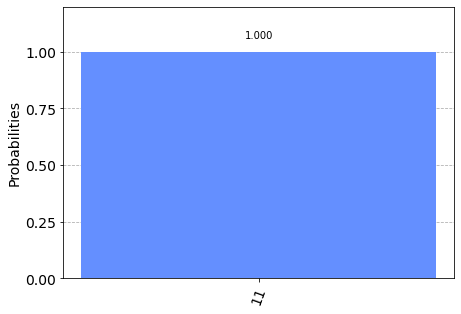

In [182]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc_test)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)